<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 162.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 174.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 155.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 151.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 146.9 MB/s eta 0:00:00


Import pandas module


In [6]:
import pandas as pd


Import matplotlib


In [7]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [8]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [16]:
## Write your code here
if df.duplicated().any():
    print("yes,duplicated")
    print("Duplicated row count:", df.duplicated().sum())
    print(df[df.duplicated(keep=False)].head())

yes,duplicated
Duplicated row count: 20
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                N

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [23]:
## Write your code here
df[df.duplicated(subset=["MainBranch", "Employment","RemoteWork"], keep=False)]
df.columns = df.columns.str.strip()
subset_cols = ["MainBranch", "Employment", "RemoteWork"]

# Mark duplicates based on the subset
duplicates = df[df.duplicated(subset=subset_cols, keep=False)]

print("Total duplicate rows based on subset:", len(duplicates))
print(duplicates.head())
consistent_columns = {} #columns tend to have the same value across duplicate rows
# Group duplicates by those key columns
grouped = duplicates.groupby(subset_cols)
for name, group in grouped:
    for col in df.columns:
        if col not in subset_cols:
            # If all values in the group are the same
            if group[col].nunique(dropna=False) == 1:
                consistent_columns.setdefault(col, 0)
                consistent_columns[col] += 1

# Sort by most frequent
consistent_columns = dict(sorted(consistent_columns.items(), key=lambda x: x[1], reverse=True))
consistent_columns

Total duplicate rows based on subset: 65290
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                             

{'Check': 319,
 'AINextMuch less integrated': 213,
 'ConvertedCompYearly': 165,
 'AINextLess integrated': 161,
 'BuildvsBuy': 161,
 'PurchaseInfluence': 156,
 'CompTotal': 152,
 'OrgSize': 151,
 'Currency': 146,
 'YearsCodePro': 144,
 'BuyNewTool': 143,
 'TechEndorse': 142,
 'Frequency_3': 135,
 'TBranch': 134,
 'ProfessionalTech': 134,
 'ProfessionalCloud': 133,
 'ICorPM': 133,
 'Knowledge_8': 132,
 'Knowledge_5': 131,
 'Industry': 130,
 'Knowledge_3': 130,
 'Frequency_1': 130,
 'TimeSearching': 130,
 'Knowledge_4': 130,
 'Knowledge_9': 130,
 'Knowledge_1': 129,
 'ProfessionalQuestion': 129,
 'Knowledge_7': 129,
 'JobSatPoints_4': 129,
 'Knowledge_6': 129,
 'TimeAnswering': 129,
 'JobSatPoints_8': 128,
 'JobSat': 128,
 'Knowledge_2': 128,
 'Frequency_2': 128,
 'Frustration': 128,
 'JobSatPoints_1': 127,
 'JobSatPoints_5': 127,
 'JobSatPoints_6': 127,
 'WorkExp': 127,
 'JobSatPoints_10': 127,
 'JobSatPoints_11': 127,
 'JobSatPoints_7': 126,
 'JobSatPoints_9': 126,
 'AINextNo change': 9

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


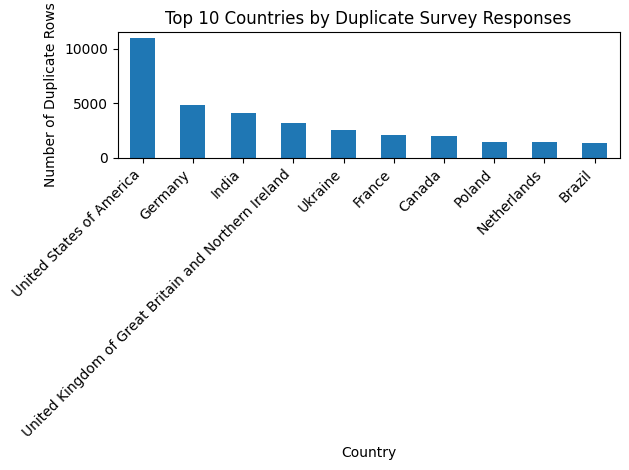

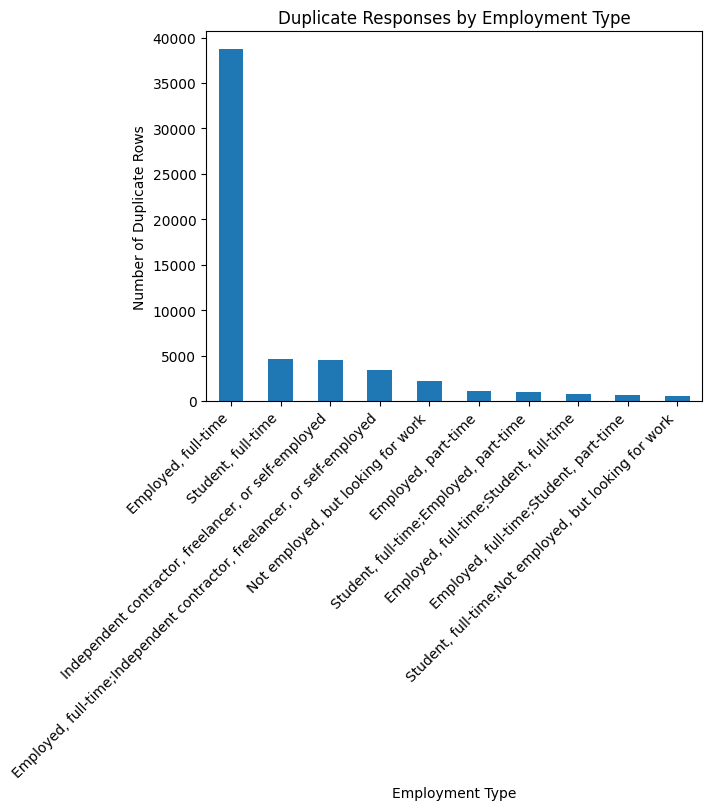

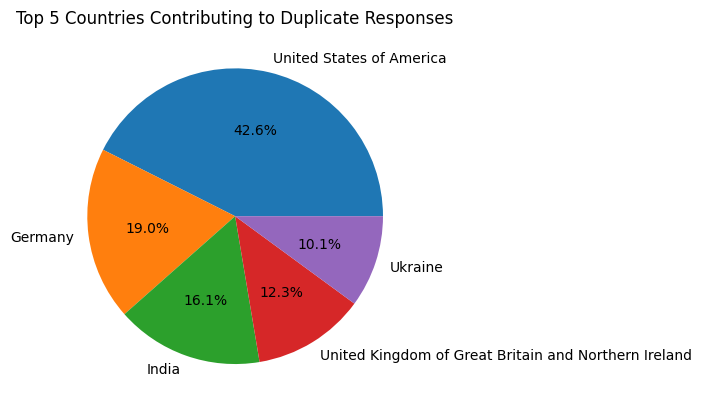

In [35]:
## Write your code here
import matplotlib.pyplot as plt
country_counts = duplicates["Country"].value_counts().head(10)
plt.figure()
country_counts.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Number of Duplicate Rows")
plt.title("Top 10 Countries by Duplicate Survey Responses")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

employment_counts = duplicates["Employment"].value_counts().head(10)

plt.figure()
employment_counts.plot(kind="bar")
plt.xlabel("Employment Type")
plt.ylabel("Number of Duplicate Rows")
plt.title("Duplicate Responses by Employment Type")
plt.xticks(rotation=45, ha="right")
##plt.tight_layout()
plt.show()

top5_countries = duplicates["Country"].value_counts().head(5)

plt.figure()
top5_countries.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")
plt.title("Top 5 Countries Contributing to Duplicate Responses")
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [39]:
## Write your code here
df[df.duplicated(subset=["MainBranch", "Employment","RemoteWork", "Country"], keep=False)]
df.columns = df.columns.str.strip()
subset_cols = ["MainBranch", "Employment", "RemoteWork", "Country"]

# Mark duplicates based on the subset
duplicates = df[df.duplicated(subset=subset_cols, keep=False)]

##print("Total duplicate rows based on subset:", len(duplicates))
##print(duplicates.head())
consistent_columns = {} #columns tend to have the same value across duplicate rows
# Group duplicates by those key columns
grouped = duplicates.groupby(subset_cols)
for name, group in grouped:
    for col in df.columns:
        if col not in subset_cols:
            # If all values in the group are the same
            if group[col].nunique(dropna=False) == 1:
                consistent_columns.setdefault(col, 0)
                consistent_columns[col] += 1

# Sort by most frequent
consistent_columns = dict(sorted(consistent_columns.items(), key=lambda x: x[1], reverse=True))
consistent_columns
#By adding the country in the candidates column, fewer duplicate rows  are returned, which is an indication that "MainBranch", "Employment","RemoteWork", "Country" are critical for uniqueness in the dataset

##Remove duplicates based on a subset of columns
unique_cols = [
    "MainBranch",
    "Employment",
    "RemoteWork",
    "Country"
]
df[df.duplicated(subset=unique_cols, keep=False)].head()
##Remove duplicates based on a subset of columns
##Keeps one representative row
##Removes redundant demographic entries
df_deduped = df.drop_duplicates(subset=unique_cols, keep="first")
print("Original rows:", len(df))
print("After deduplication:", len(df_deduped))
print(
    "Remaining duplicates:",
    df_deduped.duplicated(subset=unique_cols).sum()
)
print(df_deduped.head())

Original rows: 65457
After deduplication: 6941
Remaining duplicates: 0
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   
5           6     I code primarily as a hobby  Under 18 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   
5   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                  

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
